In [31]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('pancancerInfo.csv')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   bcr_patient_barcode                  11160 non-null  object 
 1   type                                 11160 non-null  object 
 2   age_at_initial_pathologic_diagnosis  11109 non-null  float64
 3   gender                               11160 non-null  object 
 4   race                                 11160 non-null  object 
 5   ajcc_pathologic_tumor_stage          11160 non-null  object 
 6   vital_status                         11156 non-null  object 
 7   treatment_outcome_first_course       11109 non-null  object 
 8   Event                                11151 non-null  float64
 9   Delay                                11094 non-null  float64
dtypes: float64(3), object(7)
memory usage: 872.0+ KB


In [33]:
data.isnull().sum()

bcr_patient_barcode                     0
type                                    0
age_at_initial_pathologic_diagnosis    51
gender                                  0
race                                    0
ajcc_pathologic_tumor_stage             0
vital_status                            4
treatment_outcome_first_course         51
Event                                   9
Delay                                  66
dtype: int64

In [34]:
df = data.dropna()
df = df.rename(columns = {'age_at_initial_pathologic_diagnosis' : 'age'} )

In [35]:
df

,bcr_patient_barcode,type,age,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay
0,TCGA_CF_A9FH,BLCA,85.0,MALE,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0
1,TCGA_A8_A06N,BRCA,66.0,FEMALE,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0
2,TCGA_A8_A081,BRCA,80.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
3,TCGA_A8_A083,BRCA,67.0,FEMALE,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0
4,TCGA_A8_A08H,BRCA,66.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11089,TCGA_WB_A80P,PCPG,20.0,MALE,WHITE,[Not Available],Alive,Progressive Disease,0.0,9634.0
11090,TCGA_EE_A2GD,SKCM,58.0,FEMALE,WHITE,Stage IIB,Dead,[Not Available],1.0,10346.0
11091,TCGA_FS_A1ZC,SKCM,51.0,MALE,WHITE,I/II NOS,Dead,[Not Available],1.0,10870.0
11092,TCGA_LH_A9QB,SKCM,24.0,FEMALE,WHITE,[Not Available],Alive,[Not Available],0.0,11217.0


In [36]:
df['age'].min()

10.0

In [37]:
df['age'].max()

90.0

In [38]:


bins = [1,5, 10,15, 20,25,30,35,40,45, 50,55, 60,65, 70,75,80,85,90,95,100]
labels = ['1-4', '5-10', '11-15', '16-20', '21-25', '26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75'
         ,'76-80','81-85','86-90','91-95','96-100']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)


In [39]:
df

,bcr_patient_barcode,type,age,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay,agerange
0,TCGA_CF_A9FH,BLCA,85.0,MALE,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0,81-85
1,TCGA_A8_A06N,BRCA,66.0,FEMALE,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0,66-70
2,TCGA_A8_A081,BRCA,80.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,76-80
3,TCGA_A8_A083,BRCA,67.0,FEMALE,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0,66-70
4,TCGA_A8_A08H,BRCA,66.0,FEMALE,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,66-70
...,...,...,...,...,...,...,...,...,...,...,...
11089,TCGA_WB_A80P,PCPG,20.0,MALE,WHITE,[Not Available],Alive,Progressive Disease,0.0,9634.0,16-20
11090,TCGA_EE_A2GD,SKCM,58.0,FEMALE,WHITE,Stage IIB,Dead,[Not Available],1.0,10346.0,56-60
11091,TCGA_FS_A1ZC,SKCM,51.0,MALE,WHITE,I/II NOS,Dead,[Not Available],1.0,10870.0,51-55
11092,TCGA_LH_A9QB,SKCM,24.0,FEMALE,WHITE,[Not Available],Alive,[Not Available],0.0,11217.0,21-25


# Which Gender has the highest death rate

In [105]:
df['gender'].value_counts()

FEMALE    5770
MALE      5248
Name: gender, dtype: int64

<AxesSubplot:xlabel='Event'>

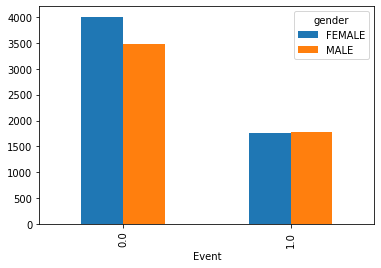

In [41]:
gender_sim = df.groupby(['Event','gender'])
gender_sim.size().unstack().plot(kind = 'bar')

# The Death rate is same for both the genders while it is slightly more for males


<AxesSubplot:xlabel='Event,gender'>

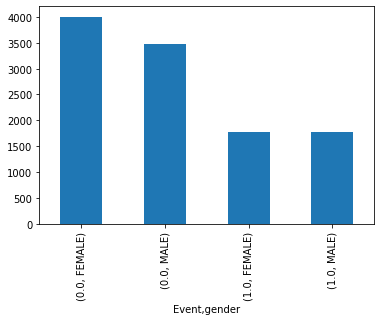

In [111]:
gender_sim = df.groupby(['Event','gender'])
gender_sim.size().plot(kind = 'bar')

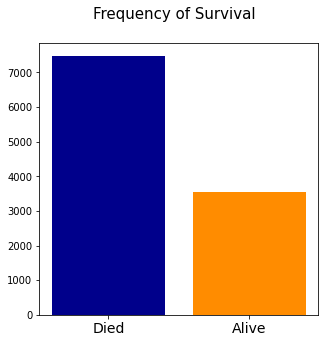

In [48]:
#THe total death and alive status
fig, ax = plt.subplots(1, figsize=(5,5))
plt.suptitle('Frequency of Survival', fontsize=15)
ax.bar(df['Event'].value_counts().index, 
       df['Event'].value_counts().values,
       color = ['darkblue', 'darkorange'])
ax.set_xticks(range(0, 2))
ax.set_xticklabels(['Died','Alive'], fontsize = 14);

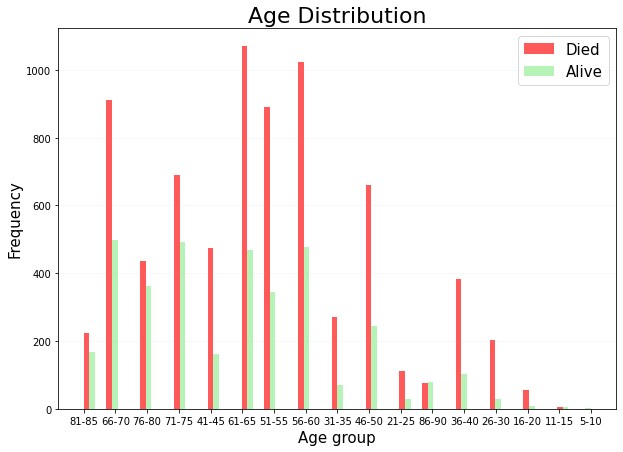

In [77]:
#Death and alive status for age groups
fig, ax = plt.subplots(figsize=(10,7))
age_died = df[df['Event']==0]['agerange']
age_survive = df[df['Event']==1]['agerange']
n, bins, patches = plt.hist(x = [age_died,age_survive] 
                            , bins='auto', 
                            color=['red','lightgreen'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution', fontsize = 22)
plt.legend(['Died','Alive'], fontsize = 15);

In [ ]:
#The death rate is more for the age range 61-65

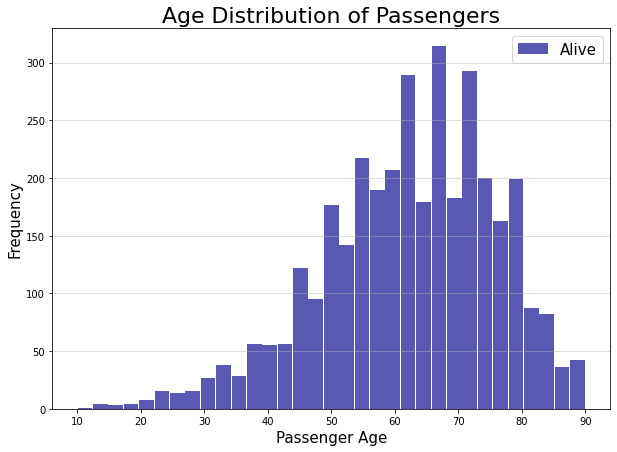

In [79]:
fig, ax = plt.subplots(figsize=(10,7))
age_died = df[df['Event']==0]['age']
age_survive = df[df['Event']==1]['age']
n, bins, patches = plt.hist(x = age_survive, 
                            stacked = True, bins='auto', 
                            color='darkblue',
                            alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)
plt.xlabel('Passenger Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution of Passengers', fontsize = 22)
plt.legend(['Alive'], fontsize = 15);

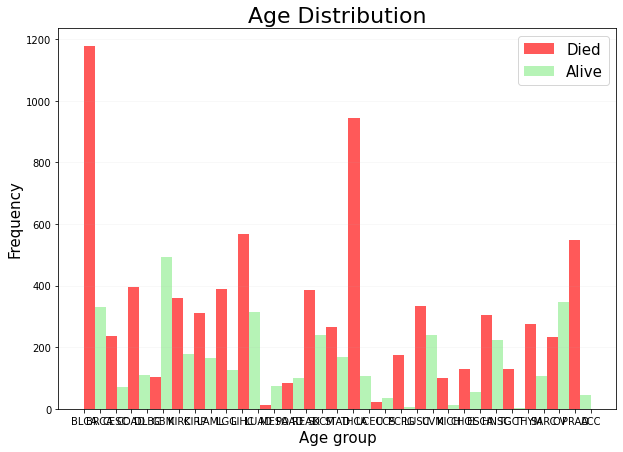

In [95]:
fig, ax = plt.subplots(figsize=(10,7))
age_died = df[df['Event']==0]['type']
age_survive = df[df['Event']==1]['type']
n, bins, patches = plt.hist(x = [age_died,age_survive] 
                            , bins='auto', 
                            color=['red','lightgreen'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution', fontsize = 22)
plt.legend(['Died','Alive'], fontsize = 15);

In [112]:
df['type'].value_counts()

BRCA    1096
GBM      594
OV       582
UCEC     545
KIRC     537
HNSC     527
LGG      514
THCA     507
LUAD     503
PRAD     500
LUSC     492
COAD     458
SKCM     455
STAD     434
BLCA     411
LIHC     376
CESC     307
KIRP     288
SARC     261
LAML     186
PAAD     185
PCPG     179
READ     170
ESCA     139
TGCT     129
THYM     123
KICH     112
ACC       92
MESO      86
UVM       80
UCS       57
DLBC      48
CHOL      45
Name: type, dtype: int64

In [121]:
#The death rate of BLCA cancer is higher compared to all the other cancers.

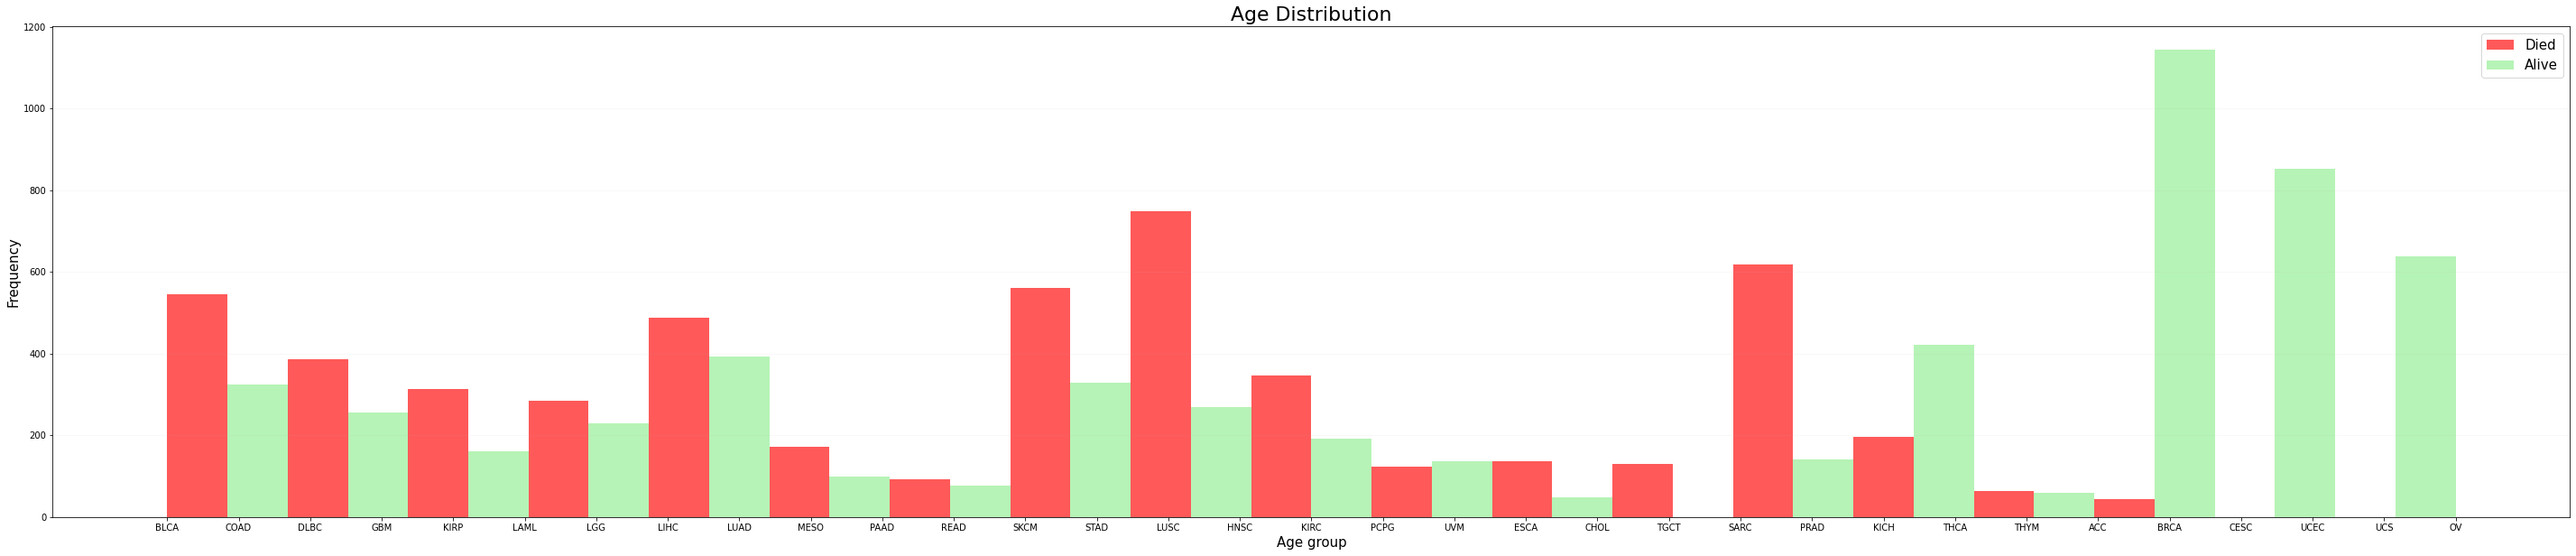

In [138]:
fig, ax = plt.subplots(figsize=(50,10))
age_died = df[df['gender']=='MALE']['type']
age_survive = df[df['gender']=='FEMALE']['type']
n, bins, patches = plt.hist(x = [age_died,age_survive] 
                            , bins='auto', 
                            color=['red','lightgreen'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution', fontsize = 22)
plt.legend(['Died','Alive'], fontsize = 15);

In [145]:
import seaborn as sns
df = df.replace({'gender': {'MALE': 1, 'FEMALE': 0}})

In [146]:
df

,bcr_patient_barcode,type,age,gender,race,ajcc_pathologic_tumor_stage,vital_status,treatment_outcome_first_course,Event,Delay,agerange
0,TCGA_CF_A9FH,BLCA,85.0,1,ASIAN,Stage II,Alive,Complete Remission/Response,0.0,0.0,81-85
1,TCGA_A8_A06N,BRCA,66.0,0,[Not Available],Stage IIIB,Alive,[Not Available],0.0,0.0,66-70
2,TCGA_A8_A081,BRCA,80.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,76-80
3,TCGA_A8_A083,BRCA,67.0,0,[Not Available],Stage IIB,Alive,[Not Available],0.0,0.0,66-70
4,TCGA_A8_A08H,BRCA,66.0,0,[Not Available],Stage IIA,Alive,[Not Available],0.0,0.0,66-70
...,...,...,...,...,...,...,...,...,...,...,...
11089,TCGA_WB_A80P,PCPG,20.0,1,WHITE,[Not Available],Alive,Progressive Disease,0.0,9634.0,16-20
11090,TCGA_EE_A2GD,SKCM,58.0,0,WHITE,Stage IIB,Dead,[Not Available],1.0,10346.0,56-60
11091,TCGA_FS_A1ZC,SKCM,51.0,1,WHITE,I/II NOS,Dead,[Not Available],1.0,10870.0,51-55
11092,TCGA_LH_A9QB,SKCM,24.0,0,WHITE,[Not Available],Alive,[Not Available],0.0,11217.0,21-25


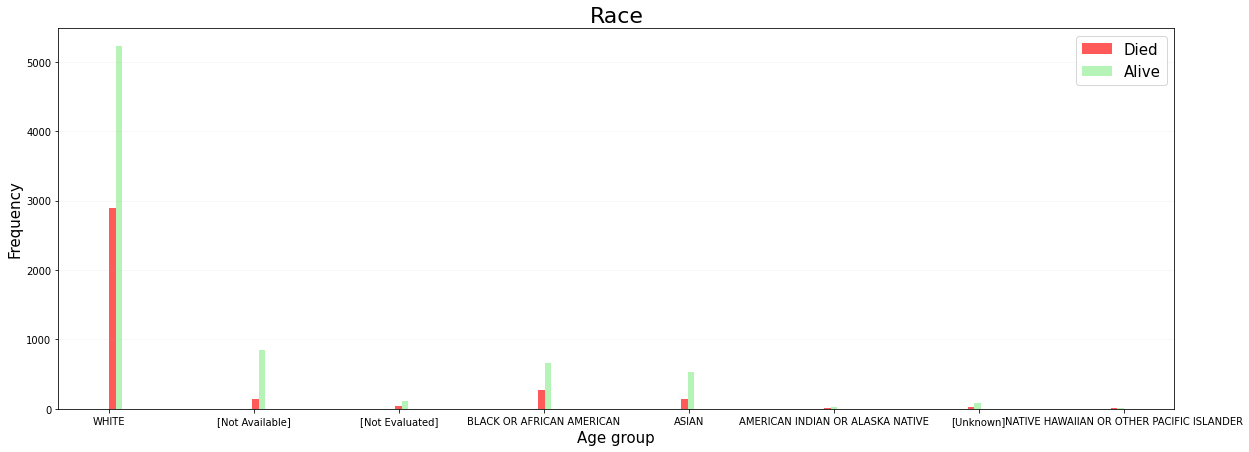

In [150]:
fig, ax = plt.subplots(figsize=(20,7))
age_died = df[df['Event']==1]['race']
age_survive = df[df['Event']==0]['race']
n, bins, patches = plt.hist(x = [age_died,age_survive] 
                            , bins='auto', 
                            color=['red','lightgreen'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Race', fontsize = 22)
plt.legend(['Died','Alive'], fontsize = 15);

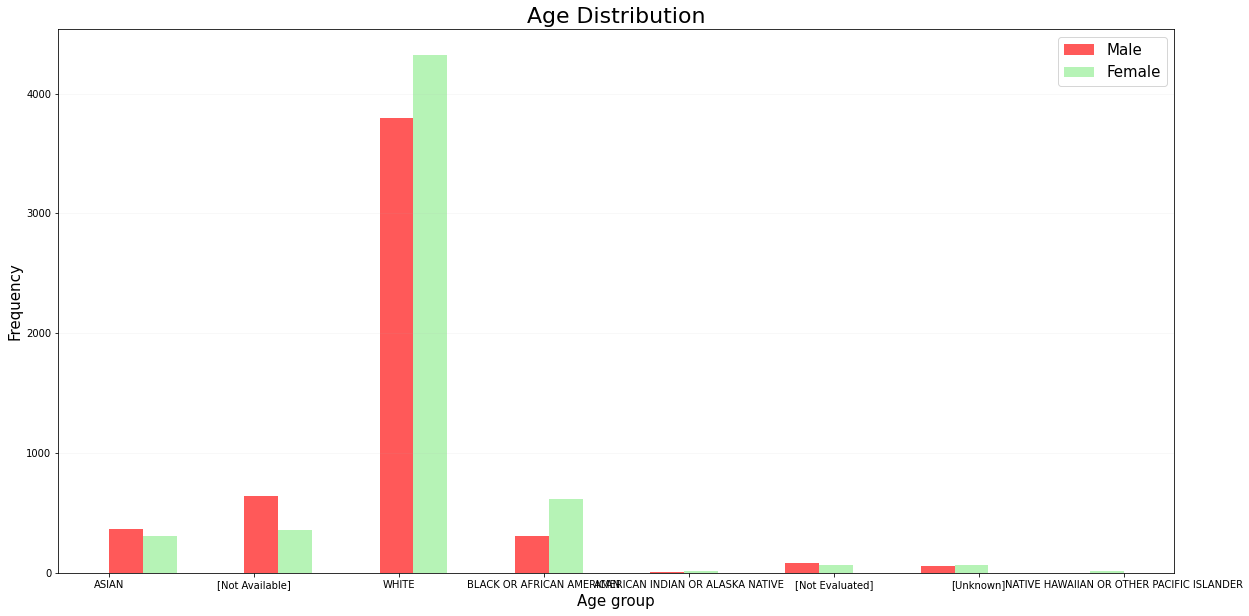

In [154]:
fig, ax = plt.subplots(figsize=(20,10))
age_died = df[df['gender']==1]['race']
age_survive = df[df['gender']==0]['race']
n, bins, patches = plt.hist(x = [age_died,age_survive] 
                            , bins='auto', 
                            color=['red','lightgreen'],
                            alpha=0.65, rwidth=1.0)
plt.grid(axis='y', alpha=0.1)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution', fontsize = 22)
plt.legend(['Male','Female'], fontsize = 15);

<AxesSubplot:xlabel='age', ylabel='type'>

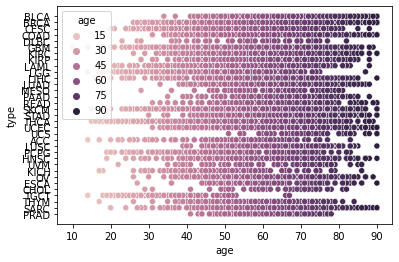

In [161]:
sns.scatterplot(x = 'age',y = 'type',data= df,hue = 'age')